In [3]:
import pandas as pd
from google.cloud import storage
import json
import os
import sys
import io
from io import BytesIO
import itertools
import numpy as np
from itertools import product
import matplotlib.pyplot as plt

In [ ]:
%pip install --upgrade google-cloud-speech

In [ ]:
%pip install --upgrade google-cloud-storage

In [4]:
PATH = os.path.join(os.getcwd(), 'when-we-met-381220-b524f7086bf2.json')
os.environ['GOOGLE_APPLICATION_CREDENTIALS']=PATH
client = storage.Client(PATH)

In [5]:
bucket= client.get_bucket('when-we-met-dataset')
filename = [filename.name for filename in list(bucket.list_blobs(prefix='')) ]
filename

['cake.xlsx', 'event.xlsx', 'food.xlsx', 'music.xlsx', 'wedding_dress.xlsx']

In [6]:
# blop = bucket.blob(blob_name = 'datasets_1.0/event.xlsx').download_as_string()
blop = bucket.blob(blob_name = 'event.xlsx').download_as_string()

In [16]:
%pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 1.8 MB/s eta 0:00:00a 0:00:01
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)
Note: you may need to restart the kernel to use updated packages.


In [7]:
eventDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'event.xlsx').download_as_string() 
              ))
cakeDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'cake.xlsx').download_as_string() 
              ))
foodDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'food.xlsx').download_as_string() 
              ))
musicDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'music.xlsx').download_as_string() 
              ))
wedding_dressDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'wedding_dress.xlsx').download_as_string() 
              ))
#display(eventDF)
# display(cakeDF)
# display(foodDF)
# display(musicDF)
# display(wedding_dressDF)
#col_list = eventDF['Location Name'].values.tolist()

lists=[eventDF['Location Name'].values.tolist(), cakeDF['Bakery'].values.tolist(), foodDF['Food Catering'].values.tolist(), musicDF['Music'].values.tolist(), wedding_dressDF['Dressers'].values.tolist()]
print(lists)
x=pd.DataFrame(list(itertools.product(*lists)), columns=['Location Name', 'Bakery', 'Food Catering', 'Music', 'Dressers'])
display(x)

[['Transept', 'The Spot of West Fifth', 'The Summit Hotel', 'Newport Syndicate', 'Taft Museum of Art', 'The Lytle Park Hotel, Autograph Collection', 'Cincinnati Marriot at River Center', 'Hotel Covington', 'Embassy Suites Cincinnati - RiverCenter', 'Woodward Theater', '20th Century Theater'], ['Cincinnati Cake & Candy Supplies', 'Haven Bakery', 'Tres Belle Cakes', '3 Sweet Girls Cakery', "Tink's Sweet Shoppe", 'Happy Chicks Bakery', 'A Spoon Fulla Sugar', 'Jazzy Sweeties Bakery', 'Mt Lookout Sweets', 'Jazzy Cake Supply'], ['Garnish Catering', 'Jeff Ruby Catering and Entertainment', 'Funkey Catering Events', "Cincinnati's Catring", "Hilver's Catering", 'Cincinnati Cooks Catering', 'Taste of Class Catering', "Vonderhaar's catering", "Bailey's Family catering", 'Jeff Thomas Catering'], ['The Chuck Taylors', 'The Sly Band', 'The Touchables', 'The Bluewater Kings Band', 'The Soul Pocket Band', 'The Rusty Griswolds', 'The Link Ensemble', 'The Remains', 'The Mistics', 'The Pete Wagner Band', 

,Location Name,Bakery,Food Catering,Music,Dressers
0,Transept,Cincinnati Cake & Candy Supplies,Garnish Catering,The Chuck Taylors,Chaz Bridal & Consignment
1,Transept,Cincinnati Cake & Candy Supplies,Garnish Catering,The Chuck Taylors,Donna Salyers Fabulous-Bridal
2,Transept,Cincinnati Cake & Candy Supplies,Garnish Catering,The Chuck Taylors,Bridal & Formal
3,Transept,Cincinnati Cake & Candy Supplies,Garnish Catering,The Chuck Taylors,Carrie Karibo Bridal Boutique
4,Transept,Cincinnati Cake & Candy Supplies,Garnish Catering,The Chuck Taylors,Lace Bridal Couture
...,...,...,...,...,...
120995,20th Century Theater,Jazzy Cake Supply,Jeff Thomas Catering,The Airwave Band,Wendy's Bridal Cincinnati
120996,20th Century Theater,Jazzy Cake Supply,Jeff Thomas Catering,The Airwave Band,Hyde Park Bridal
120997,20th Century Theater,Jazzy Cake Supply,Jeff Thomas Catering,The Airwave Band,Alterations By Toni
120998,20th Century Theater,Jazzy Cake Supply,Jeff Thomas Catering,The Airwave Band,White Wisteria Bridal Boutique


In [8]:
eventDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'event.xlsx').download_as_string() 
              ))
cakeDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'cake.xlsx').download_as_string() 
              ))
foodDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'food.xlsx').download_as_string() 
              ))
musicDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'music.xlsx').download_as_string() 
              ))
wedding_dressDF = pd.read_excel(
    io.BytesIO(
                 bucket.blob(blob_name = 'wedding_dress.xlsx').download_as_string() 
              ))
#display(eventDF)
# display(cakeDF)
# display(foodDF)
# display(musicDF)
# display(wedding_dressDF)
#col_list = eventDF['Location Name'].values.tolist()
# lists=[(eventDF['Location Name'].values,eventDF['Cost'].values)]
# print(lists)

x= list(zip(eventDF['Location Name'], eventDF['Cost']))
print(x)

y= list(zip(cakeDF['Bakery'], cakeDF['Cost']))
print(y)

z= list(zip(foodDF['Food Catering'], foodDF['Cost']))
print(z)

a= list(zip(musicDF['Music'], musicDF['Cost']))
print(a)

b= list(zip(wedding_dressDF['Dressers'], wedding_dressDF['Cost']))
print(b)


# lists=[x,y,z,a,b]
# print(lists)
# dframe=pd.DataFrame(list(itertools.product(*lists)), columns=['Location Name', 'Bakery', 'Food Catering', 'Music', 'Dressers'])
# display(x)

[('Transept', 4000), ('The Spot of West Fifth', 2000), ('The Summit Hotel', 7000), ('Newport Syndicate', 6000), ('Taft Museum of Art', 8000), ('The Lytle Park Hotel, Autograph Collection', 7000), ('Cincinnati Marriot at River Center', 4000), ('Hotel Covington', 8000), ('Embassy Suites Cincinnati - RiverCenter', 9000), ('Woodward Theater', 5000), ('20th Century Theater', 8000)]
[('Cincinnati Cake & Candy Supplies', 395), ('Haven Bakery', 471), ('Tres Belle Cakes', 340), ('3 Sweet Girls Cakery', 566), ("Tink's Sweet Shoppe", 320), ('Happy Chicks Bakery', 542), ('A Spoon Fulla Sugar', 512), ('Jazzy Sweeties Bakery', 447), ('Mt Lookout Sweets', 453), ('Jazzy Cake Supply', 409)]
[('Garnish Catering', 40), ('Jeff Ruby Catering and Entertainment', 50), ('Funkey Catering Events', 30), ("Cincinnati's Catring", 120), ("Hilver's Catering", 150), ('Cincinnati Cooks Catering', 100), ('Taste of Class Catering', 130), ("Vonderhaar's catering", 60), ("Bailey's Family catering", 50), ('Jeff Thomas Cate

In [9]:
eventTheme = 'Royal'
eventCapacity = '<50'
foodCuisine = 'continental'
foodDiet = 'vegan'
musicType = 'Jazz'
wedding_dressType = 'Romantic'
cakeTiers = 3


final = pd.DataFrame()


finalDICT = {'event', 'cake', 'food', 'music', 'dress'}

#########

eventDF['eventINDEX']= x


mask = (eventDF['Theme'] == eventTheme) & (eventDF['Capacity'] == eventCapacity)

eeeee = eventDF.loc[mask, 'eventINDEX'].values 
print(eeeee)

# final['event'] = pd.Series(eventDF.loc[mask, 'eventINDEX'].values if mask.any() else  np.nan)

display(final)

#########

cakeDF['cakeINDEX'] = y
mask2 = cakeDF['Tiers of Cake'] == cakeTiers
final['cake'] = pd.Series(cakeDF.loc[mask2, 'cakeINDEX'].values if mask.any() else np.nan)

print(cakeDF.loc[mask2, 'cakeINDEX'].values if mask.any() else np.nan)


fffff = cakeDF.loc[mask2, 'cakeINDEX'].values

print(fffff)

display(final)


#########

foodDF['foodINDEX'] = z

mask3 = (foodDF['Cuisine'] == foodCuisine) & (foodDF['dietary specifications'] == foodDiet)
final['food'] = pd.Series(foodDF.loc[mask3, 'foodINDEX'].values if mask3.any() else np.nan )
#print(type(foodDF.loc[mask3, 'foodINDEX'].values if mask3.any() else np.nan))


ggggg = foodDF.loc[mask3, 'foodINDEX'].values

print(ggggg)

display(final)


#######




musicDF['musicINDEX'] = a

mask4 = musicDF['Type'] == musicType
final['music'] = pd.Series(musicDF.loc[mask4, 'musicINDEX'].values if mask4.any() else np.nan )
#print(type(foodDF.loc[mask3, 'foodINDEX'].values if mask3.any() else np.nan))


hhhhh = musicDF.loc[mask4, 'musicINDEX'].values

print(hhhhh)

display(final)

#####

wedding_dressDF['dressINDEX'] = b

mask5 = wedding_dressDF['Type'] == wedding_dressType
final['dress'] = pd.Series(wedding_dressDF.loc[mask5, 'dressINDEX'].values if mask5.any() else np.nan )
#print(type(foodDF.loc[mask3, 'foodINDEX'].values if mask3.any() else np.nan))

iiiii = wedding_dressDF.loc[mask5, 'dressINDEX'].values

print(iiiii)

display(final)


finalDICT = {'event': eeeee, 'cake': fffff, 'food': ggggg, 'music': hhhhh, 'dress': iiiii}
print(finalDICT)

 

max_key = max(finalDICT, key=lambda k: len(finalDICT[k]))
print(max_key)

extrafinal = pd.DataFrame()

extrafinal[max_key] = finalDICT[max_key]
display(extrafinal)

del finalDICT[max_key]

print(finalDICT)
for i in finalDICT:
    extrafinal[i] = pd.Series(finalDICT[i]) 

display(extrafinal)


[('Transept', 4000) ('Taft Museum of Art', 8000)
 ('20th Century Theater', 8000)]


""


[('Haven Bakery', 471) ('A Spoon Fulla Sugar', 512)
 ('Jazzy Cake Supply', 409)]
[('Haven Bakery', 471) ('A Spoon Fulla Sugar', 512)
 ('Jazzy Cake Supply', 409)]


,cake
0,"(Haven Bakery, 471)"
1,"(A Spoon Fulla Sugar, 512)"
2,"(Jazzy Cake Supply, 409)"


[('Garnish Catering', 40)]


,cake,food
0,"(Haven Bakery, 471)","(Garnish Catering, 40)"
1,"(A Spoon Fulla Sugar, 512)",NaN
2,"(Jazzy Cake Supply, 409)",NaN


[('The Chuck Taylors', 3100) ('The Bluewater Kings Band', 4020)
 ('The Rusty Griswolds', 3600) ('The Link Ensemble', 1600)]


,cake,food,music
0,"(Haven Bakery, 471)","(Garnish Catering, 40)","(The Chuck Taylors, 3100)"
1,"(A Spoon Fulla Sugar, 512)",NaN,"(The Bluewater Kings Band, 4020)"
2,"(Jazzy Cake Supply, 409)",NaN,"(The Rusty Griswolds, 3600)"


[('Chaz Bridal & Consignment', 1600) ('Hyde Park Bridal', 1900)]


,cake,food,music,dress
0,"(Haven Bakery, 471)","(Garnish Catering, 40)","(The Chuck Taylors, 3100)","(Chaz Bridal & Consignment, 1600)"
1,"(A Spoon Fulla Sugar, 512)",NaN,"(The Bluewater Kings Band, 4020)","(Hyde Park Bridal, 1900)"
2,"(Jazzy Cake Supply, 409)",NaN,"(The Rusty Griswolds, 3600)",NaN


{'event': array([('Transept', 4000), ('Taft Museum of Art', 8000),
       ('20th Century Theater', 8000)], dtype=object), 'cake': array([('Haven Bakery', 471), ('A Spoon Fulla Sugar', 512),
       ('Jazzy Cake Supply', 409)], dtype=object), 'food': array([('Garnish Catering', 40)], dtype=object), 'music': array([('The Chuck Taylors', 3100), ('The Bluewater Kings Band', 4020),
       ('The Rusty Griswolds', 3600), ('The Link Ensemble', 1600)],
      dtype=object), 'dress': array([('Chaz Bridal & Consignment', 1600), ('Hyde Park Bridal', 1900)],
      dtype=object)}
music


,music
0,"(The Chuck Taylors, 3100)"
1,"(The Bluewater Kings Band, 4020)"
2,"(The Rusty Griswolds, 3600)"
3,"(The Link Ensemble, 1600)"


{'event': array([('Transept', 4000), ('Taft Museum of Art', 8000),
       ('20th Century Theater', 8000)], dtype=object), 'cake': array([('Haven Bakery', 471), ('A Spoon Fulla Sugar', 512),
       ('Jazzy Cake Supply', 409)], dtype=object), 'food': array([('Garnish Catering', 40)], dtype=object), 'dress': array([('Chaz Bridal & Consignment', 1600), ('Hyde Park Bridal', 1900)],
      dtype=object)}


,music,event,cake,food,dress
0,"(The Chuck Taylors, 3100)","(Transept, 4000)","(Haven Bakery, 471)","(Garnish Catering, 40)","(Chaz Bridal & Consignment, 1600)"
1,"(The Bluewater Kings Band, 4020)","(Taft Museum of Art, 8000)","(A Spoon Fulla Sugar, 512)",NaN,"(Hyde Park Bridal, 1900)"
2,"(The Rusty Griswolds, 3600)","(20th Century Theater, 8000)","(Jazzy Cake Supply, 409)",NaN,NaN
3,"(The Link Ensemble, 1600)",NaN,NaN,NaN,NaN


In [51]:
# comb = list(product(final['event'], final['cake'], final['food'], final['music'], final['dress']))

In [52]:
# print(comb)

In [11]:

import itertools
import pandas as pd

# create a sample dataframe
df = pd.DataFrame({'A': [1, 2, 3, 4, None], 'B': [5, None, 7, 8, 9]})

# get the non-NaN elements of columns A and B as lists
a_values = extrafinal['event'].dropna().tolist()
b_values = extrafinal['cake'].dropna().tolist()
c_values = extrafinal['food'].dropna().tolist()
d_values = extrafinal['music'].dropna().tolist()
e_values = extrafinal['dress'].dropna().tolist()

# generate all possible pairs of non-NaN elements from columns A and B
pairs = list(itertools.product(a_values, b_values, c_values, d_values, e_values))

print(pairs)


[(('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Chuck Taylors', 3100), ('Chaz Bridal & Consignment', 1600)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Chuck Taylors', 3100), ('Hyde Park Bridal', 1900)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Bluewater Kings Band', 4020), ('Chaz Bridal & Consignment', 1600)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Bluewater Kings Band', 4020), ('Hyde Park Bridal', 1900)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Rusty Griswolds', 3600), ('Chaz Bridal & Consignment', 1600)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Rusty Griswolds', 3600), ('Hyde Park Bridal', 1900)), (('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Link Ensemble', 1600), ('Chaz Bridal & Consignment', 1600)), (('Transept', 4000), ('Haven Bakery', 471), ('Gar

In [12]:
# total = 0
# for tup in comb:
#     for element in tup:
#         if isinstance(element, int):
#             total += element

# print(total)

# print(type(pairs[0][0][1]))
print(pairs[0])

(('Transept', 4000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Chuck Taylors', 3100), ('Chaz Bridal & Consignment', 1600))


In [13]:
budgetList=[]
cost =0
print(len(pairs))


for comb in pairs:
    for element in comb:
        cost = cost + element[1]
    budgetList.append(cost)
    cost = 0

print(budgetList)
print(len(budgetList))


72
[9211, 9511, 10131, 10431, 9711, 10011, 7711, 8011, 9252, 9552, 10172, 10472, 9752, 10052, 7752, 8052, 9149, 9449, 10069, 10369, 9649, 9949, 7649, 7949, 13211, 13511, 14131, 14431, 13711, 14011, 11711, 12011, 13252, 13552, 14172, 14472, 13752, 14052, 11752, 12052, 13149, 13449, 14069, 14369, 13649, 13949, 11649, 11949, 13211, 13511, 14131, 14431, 13711, 14011, 11711, 12011, 13252, 13552, 14172, 14472, 13752, 14052, 11752, 12052, 13149, 13449, 14069, 14369, 13649, 13949, 11649, 11949]
72


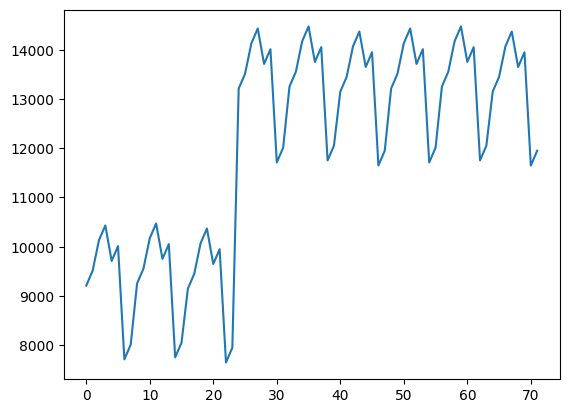

In [14]:
plt.plot(range(len(budgetList)), budgetList)
plt.show()

In [15]:
if len(budgetList) != len(set(budgetList)):
    print("There are duplicate values in the list")
else:
    print("There are no duplicate values in the list")

There are duplicate values in the list


In [16]:
from collections import Counter



# count the occurrences of each value in the list
counts = Counter(budgetList)

# iterate over the counts and print the count for each value that appears more than once
for value, count in counts.items():
    if count > 1:
        print(f"{value} appears {count} times in the list")

13211 appears 2 times in the list
13511 appears 2 times in the list
14131 appears 2 times in the list
14431 appears 2 times in the list
13711 appears 2 times in the list
14011 appears 2 times in the list
11711 appears 2 times in the list
12011 appears 2 times in the list
13252 appears 2 times in the list
13552 appears 2 times in the list
14172 appears 2 times in the list
14472 appears 2 times in the list
13752 appears 2 times in the list
14052 appears 2 times in the list
11752 appears 2 times in the list
12052 appears 2 times in the list
13149 appears 2 times in the list
13449 appears 2 times in the list
14069 appears 2 times in the list
14369 appears 2 times in the list
13649 appears 2 times in the list
13949 appears 2 times in the list
11649 appears 2 times in the list
11949 appears 2 times in the list


In [17]:
indexes = []

# loop over the list and check each element against the target
for i in range(len(budgetList)):
    if budgetList[i] == 11711:
        # if the element matches the target, append its index to the list
        indexes.append(i)

print(f"The target value {11711} appears at indexes {indexes}")

The target value 11711 appears at indexes [30, 54]


In [18]:
print(pairs[30])
print(pairs[54])

(('Taft Museum of Art', 8000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Link Ensemble', 1600), ('Chaz Bridal & Consignment', 1600))
(('20th Century Theater', 8000), ('Haven Bakery', 471), ('Garnish Catering', 40), ('The Link Ensemble', 1600), ('Chaz Bridal & Consignment', 1600))


In [20]:
print(budgetList)

[9211, 9511, 10131, 10431, 9711, 10011, 7711, 8011, 9252, 9552, 10172, 10472, 9752, 10052, 7752, 8052, 9149, 9449, 10069, 10369, 9649, 9949, 7649, 7949, 13211, 13511, 14131, 14431, 13711, 14011, 11711, 12011, 13252, 13552, 14172, 14472, 13752, 14052, 11752, 12052, 13149, 13449, 14069, 14369, 13649, 13949, 11649, 11949, 13211, 13511, 14131, 14431, 13711, 14011, 11711, 12011, 13252, 13552, 14172, 14472, 13752, 14052, 11752, 12052, 13149, 13449, 14069, 14369, 13649, 13949, 11649, 11949]


In [33]:
lst=budgetList
qwer= [(idx, val) for idx, val in enumerate(lst)]
print(qwer)

[(0, 10011), (1, 9949), (2, 10052), (3, 10069), (4, 10131), (5, 10172), (6, 9752), (7, 9711), (8, 9649), (9, 10369), (10, 10431), (11, 9552), (12, 10472), (13, 9511), (14, 9449), (15, 9252), (16, 9211), (17, 9149), (18, 11649), (19, 11649), (20, 11711), (21, 11711), (22, 11752), (23, 11752), (24, 8052), (25, 11949), (26, 11949), (27, 8011), (28, 12011), (29, 12011), (30, 7949), (31, 12052), (32, 12052), (33, 7752), (34, 7711), (35, 7649), (36, 13149), (37, 13149), (38, 13211), (39, 13211), (40, 13252), (41, 13252), (42, 13449), (43, 13449), (44, 13511), (45, 13511), (46, 13552), (47, 13552), (48, 13649), (49, 13649), (50, 13711), (51, 13711), (52, 13752), (53, 13752), (54, 13949), (55, 13949), (56, 14011), (57, 14011), (58, 14052), (59, 14052), (60, 14069), (61, 14069), (62, 14131), (63, 14131), (64, 14172), (65, 14172), (66, 14369), (67, 14369), (68, 14431), (69, 14431), (70, 14472), (71, 14472)]


In [39]:
lst=qwer
target= 9000
sorted_lst = sorted(lst, key=lambda lst: abs(lst[1] - target))
    
for i in range(3):
    index, value = sorted_lst[i]
    print(f"Index: {index}, Value: {value}")

Index: 17, Value: 9149
Index: 16, Value: 9211
Index: 15, Value: 9252


In [38]:
lst = qwer

# First, let's calculate the distances of each number from 10000
distances = [(i, abs(9000 - num)) for i, num in lst]

# Then, we sort the distances in ascending order
distances_sorted = sorted(distances, key=lambda x: x[1])

# Finally, we take the top 3 closest numbers and their respective indices
top_3_closest = [(lst[i][0], lst[i][1]) for i, d in distances_sorted[:3]]

# Print the result
print(top_3_closest)

[(17, 9149), (16, 9211), (15, 9252)]


In [53]:
#print(pairs[top_3_closest[0][0]])

for tup in top_3_closest:
    element1 = tup[0]
    element2 = tup[1]
    print(pairs[element1], element2)
    #print(element1, element2)


(('Transept', 4000), ('Jazzy Cake Supply', 409), ('Garnish Catering', 40), ('The Chuck Taylors', 3100), ('Hyde Park Bridal', 1900)) 9149
(('Transept', 4000), ('Jazzy Cake Supply', 409), ('Garnish Catering', 40), ('The Chuck Taylors', 3100), ('Chaz Bridal & Consignment', 1600)) 9211
(('Transept', 4000), ('A Spoon Fulla Sugar', 512), ('Garnish Catering', 40), ('The Link Ensemble', 1600), ('Hyde Park Bridal', 1900)) 9252
